<a href="https://colab.research.google.com/github/aishani1903/Predicting_Scores_Using_Supervised_ML/blob/main/Task__Prediction_using_Supervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Predict the percentage of students based on number of study hours

find: What will be the predicted score if the student studies for 9.25hr/day?

Author: Aishani Anavkar

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [49]:
link = 'http://bit.ly/w-data'
data = pd.read_csv(link)

#Data Exploration

In [50]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [51]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [52]:
data.shape

(25, 2)

In [53]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [54]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [55]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


#Data Visualization

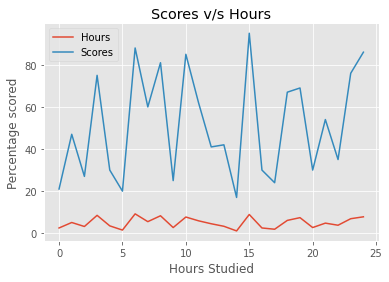

In [56]:
plt.style.use('ggplot')
data.plot(kind = 'line')
plt.title('Scores v/s Hours')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage scored')
plt.show()

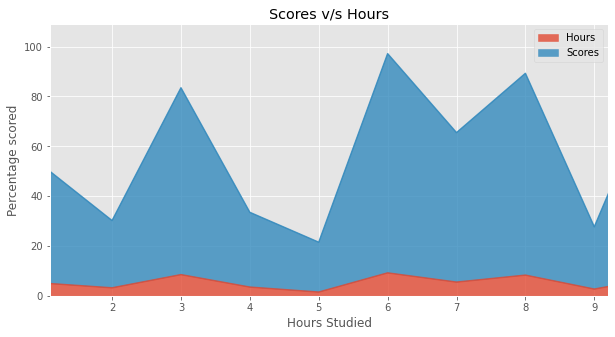

In [57]:
xmin = min(data.Hours)
xmax = max(data.Hours)
data.plot(kind = 'area', alpha = 0.8, stacked = True, figsize = (10,5), xlim = (xmin, xmax))
plt.title('Scores v/s Hours')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage scored')
plt.show()

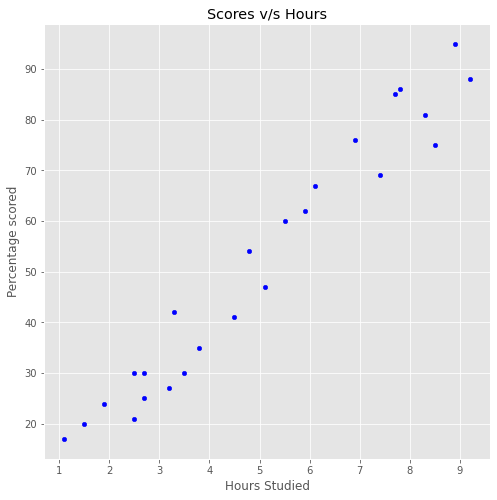

In [58]:
data.plot(kind= 'scatter', x = 'Hours', y = 'Scores', color = 'b', figsize = (8,8))
plt.title('Scores v/s Hours')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage scored')
plt.show()

#Modelling the data

In [72]:
x = np.asanyarray(data[['Hours']])
y = np.asanyarray(data['Scores'])

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [80]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(xtrain, ytrain)
regressor_coef = regressor.coef_
regressor_intercept = regressor.intercept_
print('regressor_coef: ', regressor_coef)
print('regressor_intercept: ', regressor_intercept)

regressor_coef:  [9.91065648]
regressor_intercept:  2.018160041434662


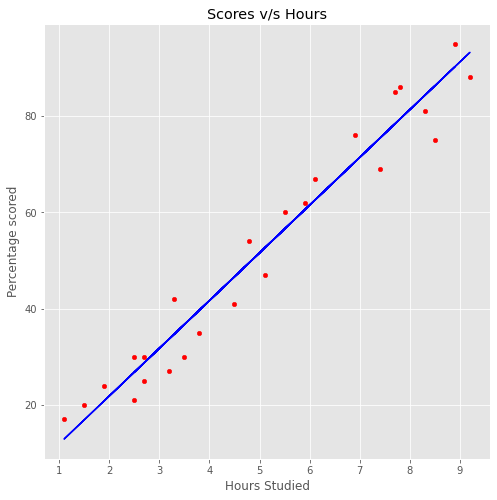

In [82]:
data.plot(kind = 'scatter', x = 'Hours', y = 'Scores', color = 'r', figsize = (8,8))
plt.plot(xtrain, regressor_coef[0]*xtrain + regressor_intercept, color = 'b')
plt.title('Scores v/s Hours')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage scored')
plt.show()

In [85]:
from sklearn.metrics import r2_score
from sklearn import metrics
ypred = regressor.predict(xtest)
print("Mena Absolute Error: {}", format(metrics.mean_absolute_error(ypred, ytest)))
print("R2score: ", r2_score(ypred, ytest))

Mena Absolute Error: {} 4.183859899002982
R2score:  0.9546785947197246


In [87]:
df = pd.DataFrame({'Actual: ': ytest, 'Predicted: ':ypred})
df

,Actual:,Predicted:
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


#Predict with single input value

In [89]:
hours = 9.25
predicted_score = regressor.predict([[hours]])
print('Number of hours: ', hours)
print("Predicted Score: ", predicted_score[0])

Number of hours:  9.25
Predicted Score:  93.69173248737539
